###**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

###**Fetching and checking out the data**

We will run some exploratory analysis on our dataset now that it is loaded in the vehicles variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features.

In [ ]:
vehicles=pd.read_csv("ucp.csv")
vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
vehicles.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Luckily we have no missing/null values in our dataset.

In [ ]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


This analysis will help us scale our dataset.

### **Exploratory Data Analysis(EDA)**

**Visualizing the categorical data :**

###1. Owner Type


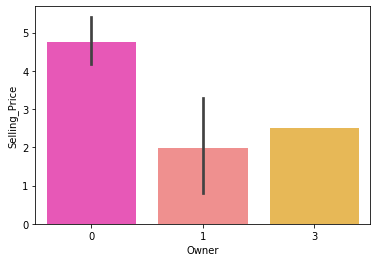

In [ ]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

Looks like the vehicles belonging to owner 0 have the highest selling price

###2. Transmission type

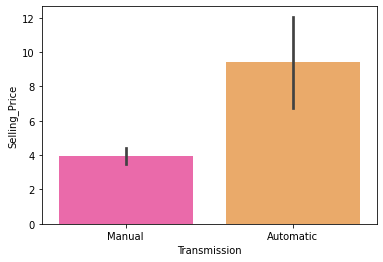

In [ ]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.

###3. Fuel type

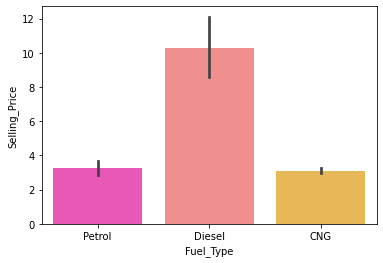

In [ ]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

###4. Seller type

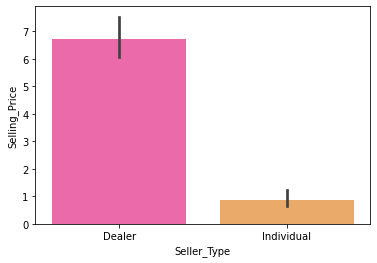

In [ ]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

Dealers can sell vehicles at a higher selling price than a general individual.

**Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :**

###1. Kms driven

<Figure size 720x720 with 0 Axes>

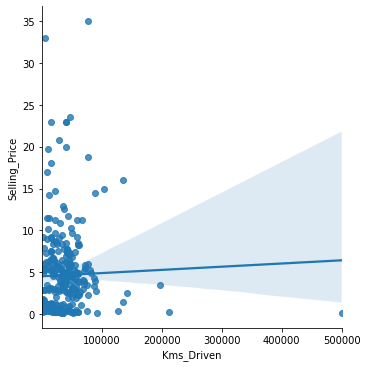

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

The selling price is found to be higher for vehicles with less kms.

###2. Present price

<Figure size 720x720 with 0 Axes>

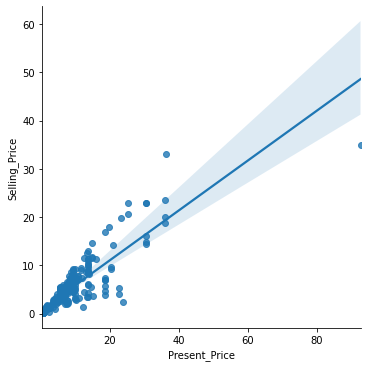

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

###3. Vehicle age

In [ ]:
vehicles['Vehicle_Age']=2020- vehicles['Year']
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


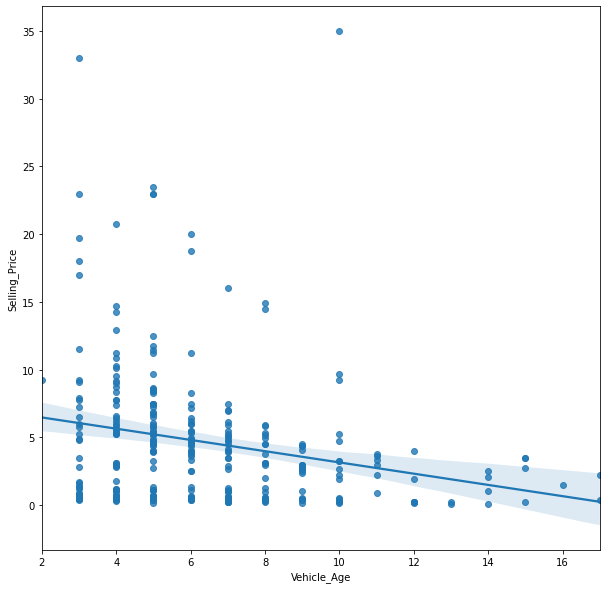

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

It seems the selling price decreases overall for older/ageing vehicles

###**Feature Engineering**

**Let's convert categorical features to numeric type.**

In [ ]:
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)
vehicles.drop(columns=['Year'],inplace=True)
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


* Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
* Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
* Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer and '0' Seller_Type_Individual.


###Understanding and Visualizing Correlations amongst the features

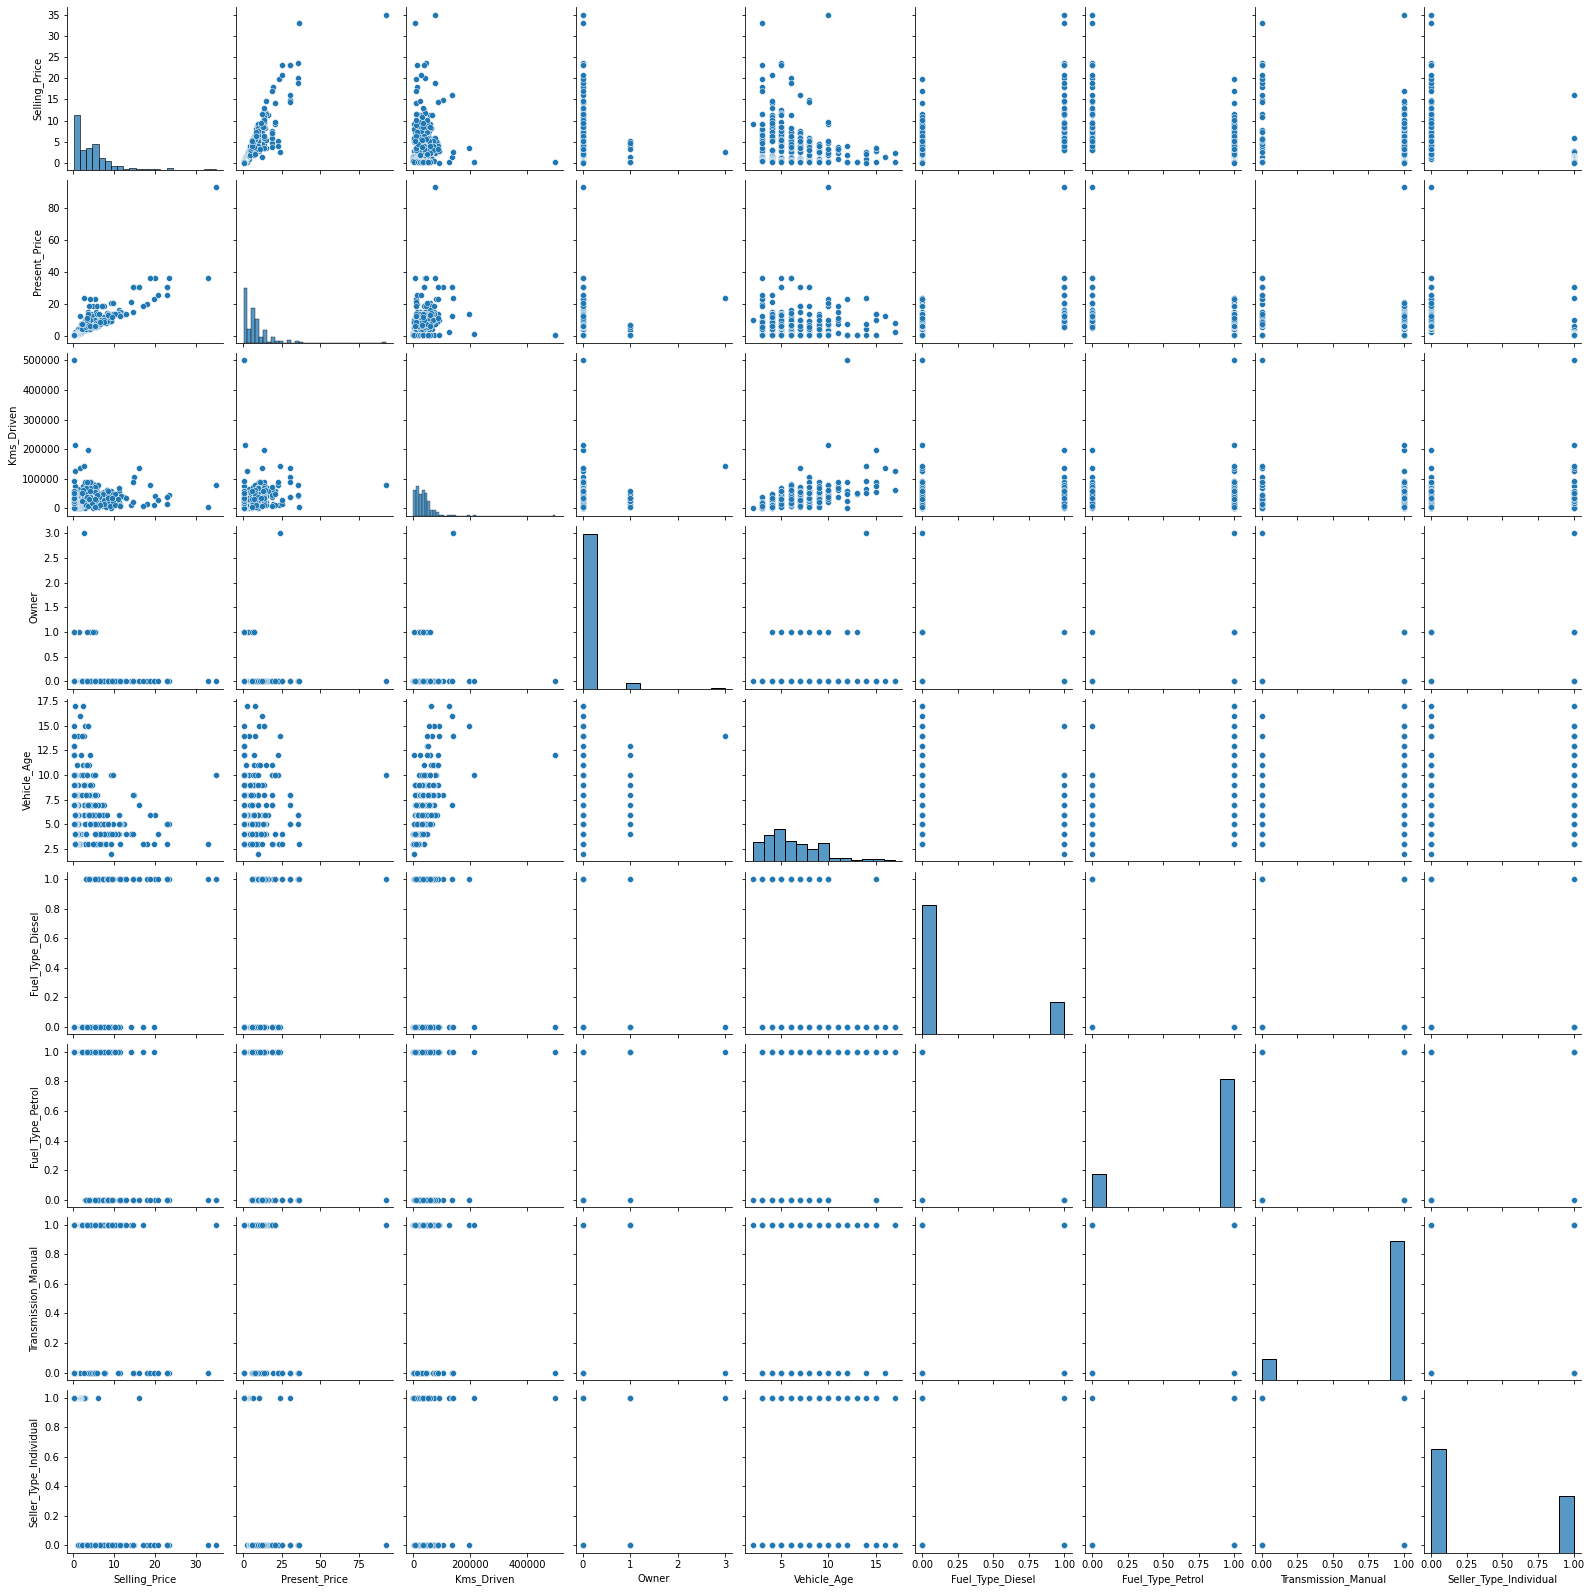

In [ ]:
sns.pairplot(vehicles)

* The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.
* Selling price seems to be considerably correlated with the Present Price feature.

###Correlation HeatMap

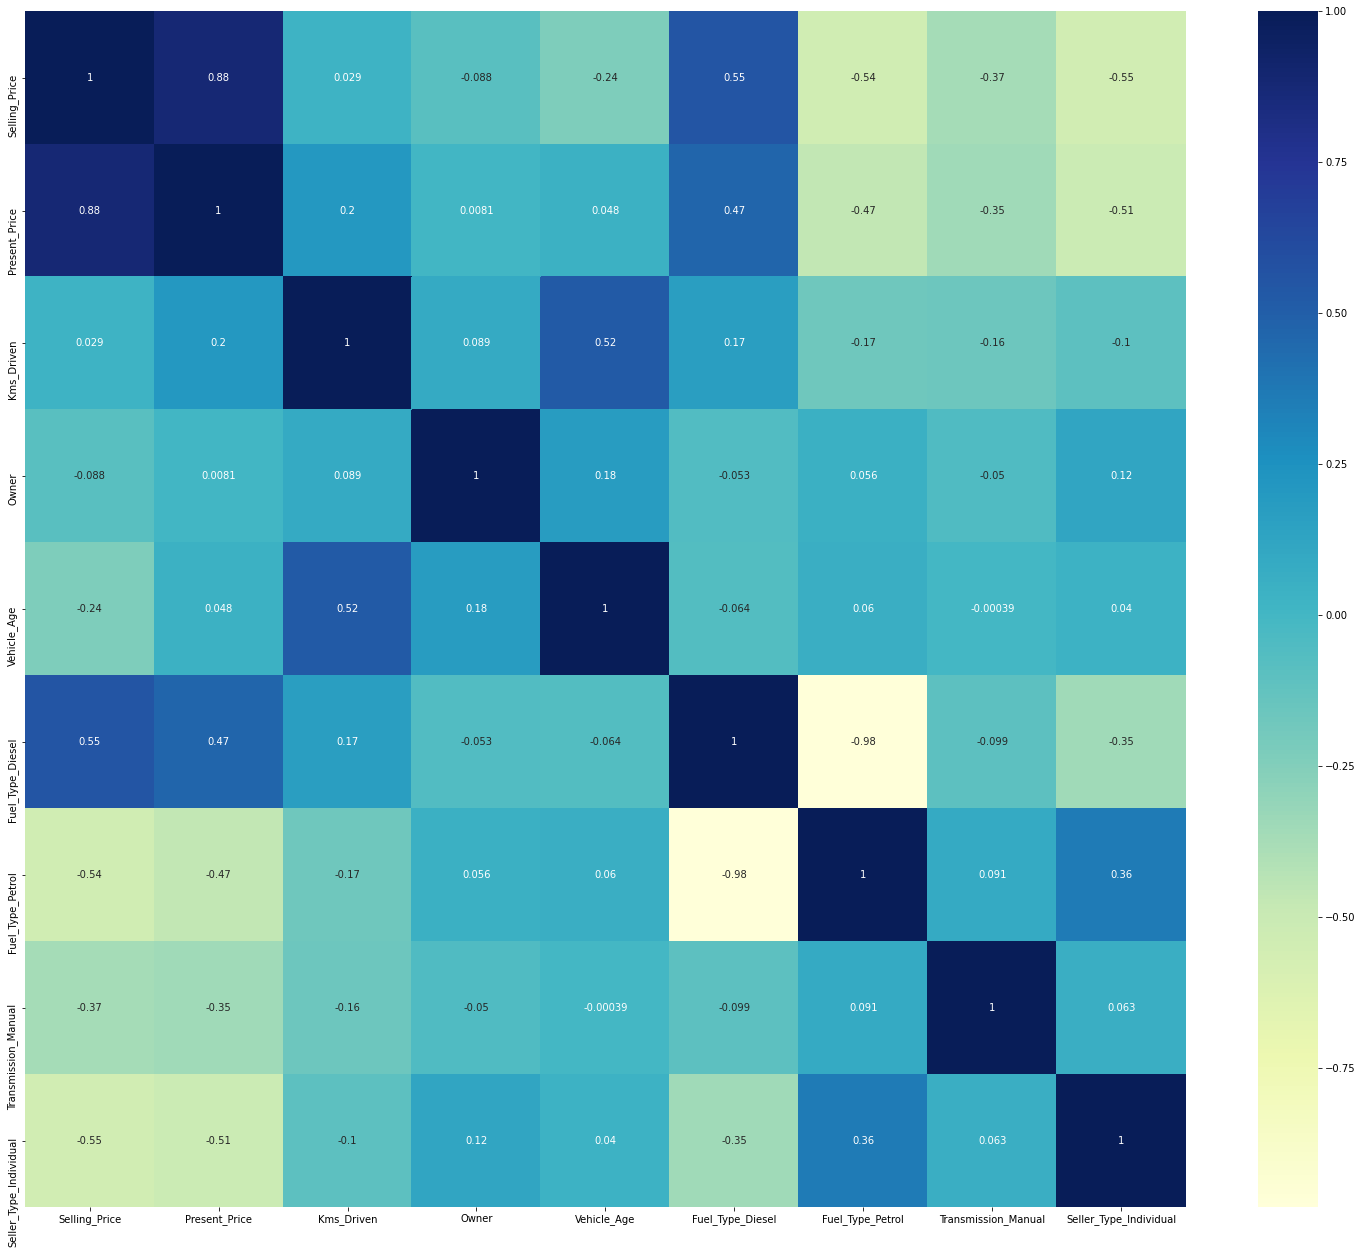

In [ ]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")

###**Training our Linear Regression Model**

Let's first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

###1. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

vehicles_train[var]=scaler.fit_transform(vehicles_train[var])
vehicles_test[var]=scaler.transform(vehicles_test[var])

X_test=vehicles_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']

###2. Creating and Training the Model
Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###3. Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
print(lm.intercept_)

0.17857294626649256


In [ ]:
temp=vehicles.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price,0.742407
Kms_Driven,-0.041166
Owner,0.117336
Vehicle_Age,-0.227644
Fuel_Type_Diesel,0.486842
Fuel_Type_Petrol,0.081617
Transmission_Manual,-0.312737
Seller_Type_Individual,-0.221881


####**Interpreting the coefficients:**
####For numerical features:

Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.742.
Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0411.
Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.22764.

###4. Predictions from our Model
Let's grab predictions off our test set and see how well it did.

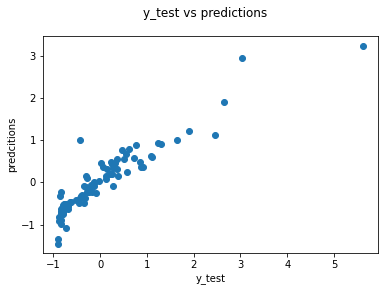

In [ ]:
predictions=lm.predict(X_test)

fig = plt.figure()
fig.suptitle('y_test vs predictions')
plt.xlabel('y_test')
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

**Residual Histogram**

Text(0.5, 0.98, 'Residual Analysis')

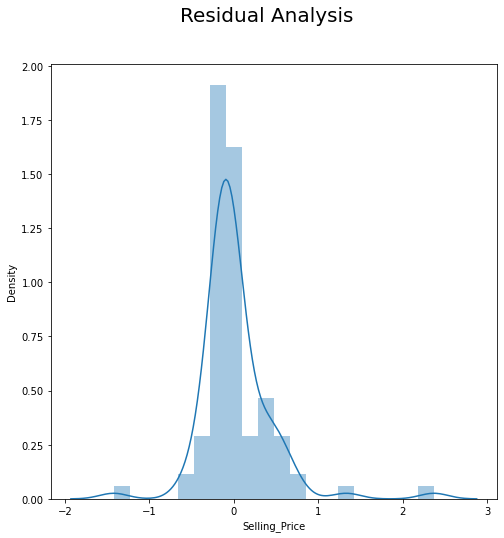

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)
fig.suptitle('Residual Analysis', fontsize = 20)

###5. Regression Evaluation Metrics

We will calculate three common evaluation metrics for regression problems:
* Mean Absolute Error (MAE) which is the mean of the absolute value of the errors
* Mean Squared Error (MSE) which is the mean of the squared errors
* Root Mean Squared Error (RMSE) which is the square root of the mean of the squared errors

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2522278859371735
MSE: 0.17152491124206026
RMSE: 0.41415566064230036


In [ ]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.8316982715837705

###6. Conclusions
Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
Resale value of Automatic vehicle is more than that of a Manual vehicle.
Car age is effecting negatively as the Selling Price decreases for an older car.
Resale value of cars with Fuel type Diesel is higher.